# 曲線和曲面的畫圖

2019 年在政大開設的幾何學課程, 我們用了 do Carmo "Differential Geometry of Curves and Surfaces" 這本書。如果我們能畫曲線或是曲面, 當然更容易理解發生了什麼事。因此有了這份講義。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 01. 基本畫圖

Python (其實是 `matplotlib`) 喜歡把 X, Y 座標分開來列。例如, 我們想把

    (1, 2.3), (1.3, 4.2), (2, -5), (2.5, 6.7), (5, -2.2)
    
點出來再連成折線圖, 我們可以這樣做。

In [2]:
X = [1, 1.3, 2, 2.5, 5]
Y = [2.3, 4.2, -5, 6.7, -2.2]

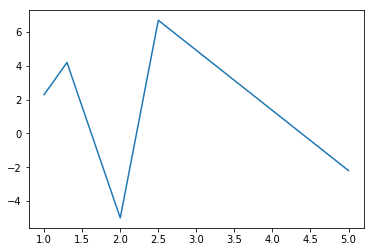

In [3]:
plt.plot(X, Y)

如果我們只放 Y 座標也可以畫, 此時 Python 會自動補上 0, 1, 2, 3, 4 當 X 座標。

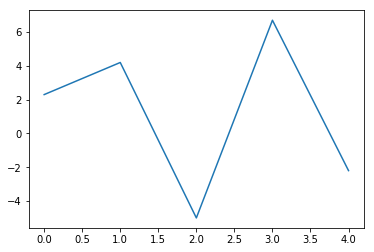

In [4]:
plt.plot(Y)

## 02. $y=f(x)$ 函數畫圖

### 自動產生 array 的方法

科學計算中, 我們最常用的資料形態是 array。array 很像前面出現的 list, 但對數據分析方便很多。例如要生出很規律的 X 座標, 我們自己打實在太麻煩。這裡介紹兩個自動產生 array 的方法。

    np.arange(a, b, s)
    
這樣會產生 $a \leq x < b$ 的數, 間隔是 $s$。和 Python 原本的 `range` 指令很像, 事實上就是 array 版的 `range`! array 版有個特别功能就是可以產生浮點數, 原本的 `range` 版不行。

    np.linspace(a, b, n)
    
這會產生 $a \leq x \leq b$ 的數, 很均勻的取出 $n$ 個點。

### 來畫函數!

我們現在來畫個函數, 比如說 $\mathrm{sinc}$, X 座標範圍 $[-5, 5]$。

In [5]:
x = np.linspace(-5, 5, 200)
y = np.sinc(x)

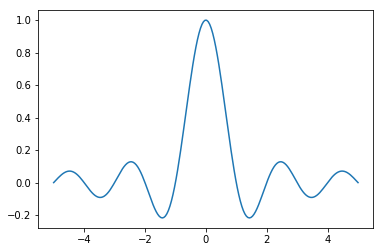

In [6]:
plt.plot(x, y)

### 基本修飾 (快速型)

`matplotlib` 有幾個快速修圖的方式。比如改變顏色。

![快選顏色](images/fast_color.jpeg)

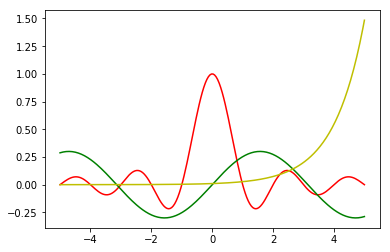

In [7]:
plt.plot(x, y, 'r')
plt.plot(x, 0.3*np.sin(x), 'g')
plt.plot(x, np.exp(x)/100, 'y')

顏色可以直接用 R, G, B 的方式指定, 我偏好用我們寫 HTML 等時用 16 進位表示方式。

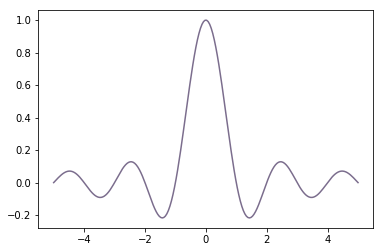

In [8]:
plt.plot(x, y, '#7B6D8D')

你可以用各種的工具幫你找出這些顏色代碼, 比如說使用 [coolors.co](https://coolors.co/) 這種配色網站, 所有顏色代表的 code 都會顯示出來。

線條形式也很多可以選擇。

In [9]:
x = np.arange(0, 5, 0.5)
y = np.random.randn(len(x))

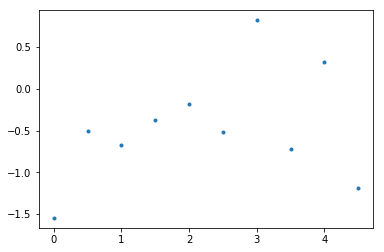

In [10]:
plt.plot(x, y, '.')

還可以試 `'-.'`, `:` 等等。

有時就變成標記。

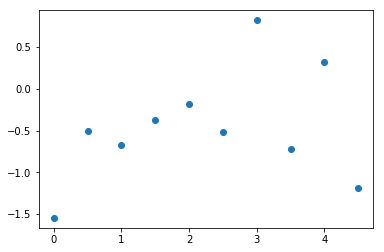

In [11]:
plt.plot(x, y, 'o')

還可以試 `'v'`, `'>'`, `'4'` 等等。更多資訊請參考

[【Mathplotlib 官方說明文件】](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.pyplot.plot.html)

另外畫出點時我們其實更常用 `plt.scatter`。

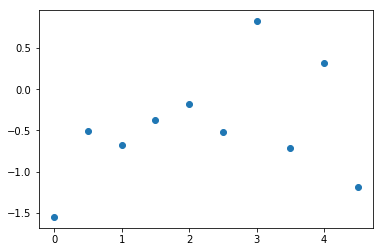

In [12]:
plt.scatter(x, y)

### 基本修飾 (正規型)

所譋正規, 也只是告訴 `matplotlib` 我們要做什麼, 比方說改顏色就是設顏色參數。

In [13]:
x = np.linspace(0, 2*np.pi, 200)
y = np.sin(x) + 0.4*x

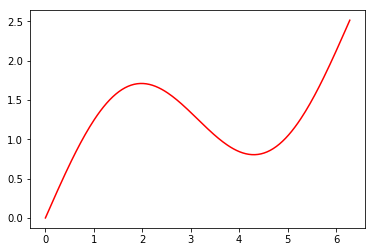

In [14]:
plt.plot(x, y, c='r')

常用的還有改變線寬, 其他詳細說明依然請參考 `matplotlib` 官網。

[【Mathplotlib 官方說明文件】](https://matplotlib.org/3.0.2/api/_as_gen/matplotlib.pyplot.plot.html)

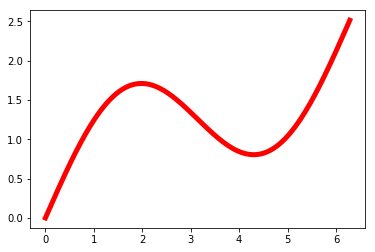

In [15]:
plt.plot(x, y, c='r', lw=5)

## 03. `matplotlib` 圖的結構

我們這裡解釋一下 `matplotlib` 圗的結構, 這樣在進階技巧中, 大家比較知道人家在做什麼。

![matplotlib 圖的結構](images/figure.png)

要對整張圖或其中一個子圖做設定時, 我們需要知道目前到底在哪裡運作, 因此有了 `gcf`, `gca` 指令, 用法是像這樣。

    ax = plt.gca()

## 04. 參數式

想清楚之後, 我們會知道, 參數式其實就用平常的

    plt.plot
    
就可以了! 就是把每點的 x 座樏、y 座標生出來, 然後連起來。

In [16]:
t = np.linspace(0, 2*np.pi, 500)

In [17]:
r = 3
x = r*np.cos(t)
y = r*np.sin(t)

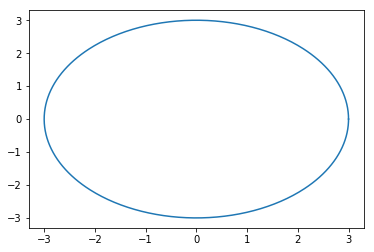

In [18]:
plt.plot(x, y)

等等, 這 x-y 的比例怪怪的。我們要把這個 axes (事實上是唯一一組 axes) 修正一下。

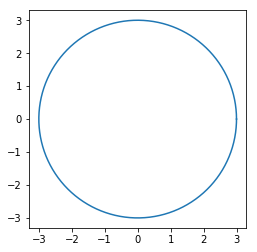

In [19]:
ax = plt.gca()
ax.set_aspect('equal')

plt.plot(x, y)

## 05. 多圖 (多個 axes) 的做法

一個 figure 中要很多個 axes 的做法, 最重要的是要標出矩陣的結構, 還有第幾張圖。

![多圖排列](images/axes.jpeg)

比如說這裡的第一張圖
   
    plt.subplot(221)
    
第二張圖

    plt.subplot(222)
    
等等。

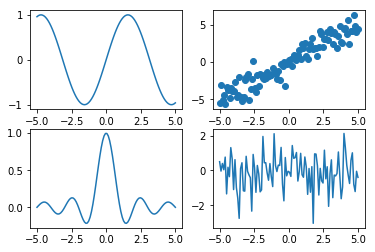

In [20]:
x = np.linspace(-5, 5, 100)

plt.subplot(221)
plt.plot(x, np.sin(x))

plt.subplot(222)
plt.scatter(x, x + np.random.randn(100))

plt.subplot(223)
plt.plot(x, np.sinc(x))

plt.subplot(224)
plt.plot(x, np.random.randn(100))

## 05. 在 $\mathbb{R}^3$ 畫個曲線

`matplotlib` 畫三維圖形的工具是 `mpl_toolkits.mplot3d`。要畫三維空間中的圖的時候, 我們首先有個很玄妙的事要做。

In [21]:
from mpl_toolkits.mplot3d import Axes3D

這看起來沒有很特别啊, 就是從 `mpl_toolkits.mplot3d` 引入一個叫 `Axes3D` 的指令不是嗎? 可是你之後會發現, 我們根本沒用什麼叫 `Axes3D` 的東西, 可是你不引入會出問題!

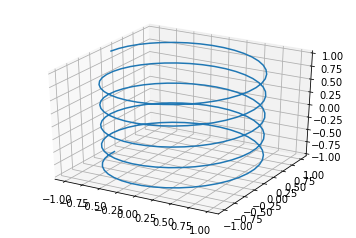

In [22]:
t = np.linspace(-5*np.pi, 5*np.pi, 200)

x = np.cos(t)
y = np.sin(t)
z = t/(5*np.pi)

ax = plt.gca(projection='3d')
plt.plot(x,y,z)

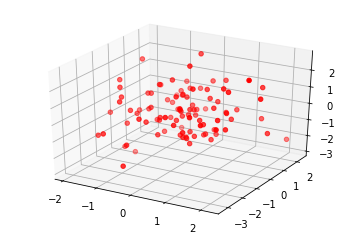

In [23]:
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

ax = plt.gca(projection='3d')
ax.scatter(x, y, z, c='r')

### 注意

1. 在用 `scatter` 畫圖要用 `ax.scatter`。
2. 你也可以在使用 `subplot` 時直接指定 `projection='3d'`。另外, 你是不是發現這基本上和二維的畫法是一樣的, 只是現在多了個高度! 不過要畫曲面就有點不同了...

## 06. 3D 畫圖的好幫手 `meshgrid`

在畫標準函數曲線的時候, 我們常常需要對 x 軸 (一個變數) 自動切出很多點。要畫曲面時, 就會需要對 xy 平面切出很多格點。最方便的方法是我們分別切出 x, y 的座標然後找出所有格點的座標, 然後 Python 自動幫我們找到所有的格點 (如圖)。

![meshgrid](images/meshgrid.png)

和之前一樣, Python 很愛把 x, y 座標分開, 所以 `meshgrid` 會給我們指定 x 座標和 y 座標生出的格點, 回傳的格式分別把格點 x, y 座標列出。只是, 給的方式不再是一個向量, 而是一個矩陣: 一列一列的把 x (或 y) 座標列出來!

In [24]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])

In [25]:
X, Y = np.meshgrid(x, y)

In [26]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [27]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

## 07. 畫個三維空間中的曲面

我們現在來畫

    z = f(x, y)
    
這種樣子的曲面, 這就要用我們前面 `meshgrid` 的技巧。

In [28]:
from mpl_toolkits.mplot3d import Axes3D

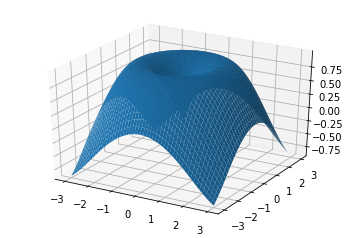

In [29]:
x = y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

ax = plt.gca(projection='3d')
ax.plot_surface(X, Y, Z)

再來我們來畫個每個幾何學家都會畫的 torus。

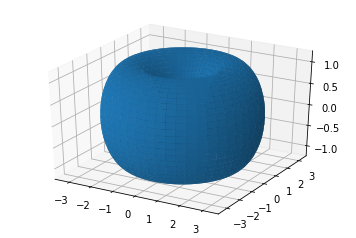

In [30]:
c = 2
a = 1.2

t = np.linspace(0, 2*np.pi, 2000)
u, v = np.meshgrid(t, t)
x = (c + a*np.cos(v)) * np.cos(u)
y = (c + a*np.cos(v)) * np.sin(u)
z = a * np.sin(v)

ax = plt.gca(projection='3d')

ax.plot_surface(x, y, z)